# BEON Data Analyst Exercise

In [1]:
# Imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter

In [2]:
# Read the data
airlines = pd.read_csv('data/nyc_airlines.csv')
airports = pd.read_csv('data/nyc_airports.csv')
flights = pd.read_csv('data/nyc_flights_fixed.csv')
airports = pd.read_csv('data/nyc_planes.csv')
weather = pd.read_csv('data/nyc_weather.csv')


### 1. Determine the number of distinct destinations connected to the airport

In [3]:
flights.head()

,Unnamed: 0,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,0,2013,1,1,517,515,2,830,819,11,UA,1545,N14228,EWR,IAH,227,1400,5,15,2013-01-01T10:00:00Z
1,1,2013,1,1,533,529,4,850,830,20,UA,1714,N24211,LGA,IAH,227,1416,5,29,2013-01-01T10:00:00Z
2,2,2013,1,1,542,540,2,923,850,33,AA,1141,N619AA,JFK,MIA,160,1089,5,40,2013-01-01T10:00:00Z
3,3,2013,1,1,554,600,-6,812,837,-25,DL,461,N668DN,LGA,ATL,116,762,6,0,2013-01-01T11:00:00Z
4,4,2013,1,1,554,558,-4,740,728,12,UA,1696,N39463,EWR,ORD,150,719,5,58,2013-01-01T10:00:00Z


In [4]:
# Capture the flights coming out of Newark Airport in different dataframe
mask = flights['origin'] == 'EWR'
ewr_origin = flights[mask].copy()

In [5]:
print(f'There are {ewr_origin["dest"].nunique()} distinct destinations connected to the airport:')

print()

print(ewr_origin['dest'].unique())

There are 82 distinct destinations connected to the airport:

['IAH' 'ORD' 'FLL' 'SFO' 'LAS' 'PBI' 'MIA' 'ATL' 'PHX' 'MSP' 'LAX' 'IAD'
 'CLT' 'SNA' 'TPA' 'RSW' 'SEA' 'DEN' 'MCO' 'BOS' 'JAX' 'CHS' 'MEM' 'DFW'
 'MYR' 'JAC' 'RDU' 'DTW' 'SAN' 'MDW' 'CLE' 'EGE' 'DCA' 'AVL' 'STL' 'BUF'
 'IND' 'MKE' 'PWM' 'SAV' 'SYR' 'CMH' 'ROC' 'BWI' 'BTV' 'DAY' 'HOU' 'ALB'
 'BDL' 'SLC' 'PIT' 'HNL' 'MHT' 'MSN' 'GSO' 'CVG' 'AUS' 'RIC' 'GSP' 'GRR'
 'MCI' 'BNA' 'SAT' 'SDF' 'PDX' 'OMA' 'TUL' 'TYS' 'OKC' 'PVD' 'DSM' 'ORF'
 'XNA' 'MSY' 'CAE' 'PHL' 'HDN' 'BZN' 'MTJ' 'SBN' 'TVC' 'ANC']


7. Create a ranking of airlines based on the number of flights they operate

In [6]:
airlines.head()

,carrier,name
0,9E,Endeavor Air Inc.
1,AA,American Airlines Inc.
2,AS,Alaska Airlines Inc.
3,B6,JetBlue Airways
4,DL,Delta Air Lines Inc.


In [7]:
ewr_origin.head()

,Unnamed: 0,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,0,2013,1,1,517,515,2,830,819,11,UA,1545,N14228,EWR,IAH,227,1400,5,15,2013-01-01T10:00:00Z
4,4,2013,1,1,554,558,-4,740,728,12,UA,1696,N39463,EWR,ORD,150,719,5,58,2013-01-01T10:00:00Z
5,5,2013,1,1,555,600,-5,913,854,19,B6,507,N516JB,EWR,FLL,158,1065,6,0,2013-01-01T11:00:00Z
11,11,2013,1,1,558,600,-2,923,937,-14,UA,1124,N53441,EWR,SFO,361,2565,6,0,2013-01-01T11:00:00Z
13,13,2013,1,1,559,600,-1,854,902,-8,UA,1187,N76515,EWR,LAS,337,2227,6,0,2013-01-01T11:00:00Z


In [8]:
flight_by_carrrier = ewr_origin[['carrier', 'flight']].groupby(['carrier'], as_index=False).count()

In [9]:
flight_by_carrrier.sort_values(by='flight', axis=0, ascending=False).merge(airlines,
                on='carrier')

,carrier,flight,name
0,UA,43983,United Air Lines Inc.
1,EV,43939,ExpressJet Airlines Inc.
2,WN,6165,Southwest Airlines Co.
3,B6,6086,JetBlue Airways
4,US,4297,US Airways Inc.
5,DL,4237,Delta Air Lines Inc.
6,VX,1566,Virgin America
7,9E,1200,Endeavor Air Inc.
8,AA,1145,American Airlines Inc.
9,AS,714,Alaska Airlines Inc.


### 5. Identify the month with the highest accumulated departure delay.

In [10]:
ewr_origin.head()

,Unnamed: 0,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,0,2013,1,1,517,515,2,830,819,11,UA,1545,N14228,EWR,IAH,227,1400,5,15,2013-01-01T10:00:00Z
4,4,2013,1,1,554,558,-4,740,728,12,UA,1696,N39463,EWR,ORD,150,719,5,58,2013-01-01T10:00:00Z
5,5,2013,1,1,555,600,-5,913,854,19,B6,507,N516JB,EWR,FLL,158,1065,6,0,2013-01-01T11:00:00Z
11,11,2013,1,1,558,600,-2,923,937,-14,UA,1124,N53441,EWR,SFO,361,2565,6,0,2013-01-01T11:00:00Z
13,13,2013,1,1,559,600,-1,854,902,-8,UA,1187,N76515,EWR,LAS,337,2227,6,0,2013-01-01T11:00:00Z


In [11]:
ewr_delay = ewr_origin[ewr_origin['dep_delay'] > 0].copy()
ewr_delay.head()

,Unnamed: 0,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,0,2013,1,1,517,515,2,830,819,11,UA,1545,N14228,EWR,IAH,227,1400,5,15,2013-01-01T10:00:00Z
15,16,2013,1,1,601,600,1,844,850,-6,B6,343,N644JB,EWR,PBI,147,1023,6,0,2013-01-01T11:00:00Z
28,38,2013,1,1,632,608,24,740,728,12,EV,4144,N13553,EWR,IAD,52,212,6,8,2013-01-01T11:00:00Z
33,44,2013,1,1,644,636,8,931,940,-9,UA,1701,N75435,EWR,FLL,151,1065,6,36,2013-01-01T11:00:00Z
36,47,2013,1,1,646,645,1,1023,1030,-7,UA,1496,N38727,EWR,SNA,380,2434,6,45,2013-01-01T11:00:00Z


In [12]:
month_delay = ewr_delay[['month', 'dep_delay']].groupby(by='month', as_index=False).sum().copy()

In [13]:
month_delay['cumulative_delay'] = month_delay['dep_delay'].cumsum()

In [14]:
# Visualize the 
month_delay

,month,dep_delay,cumulative_delay
0,1,158147,158147
1,2,126996,285143
2,3,194218,479361
3,4,190438,669799
4,5,172293,842092
5,6,227657,1069749
6,7,231943,1301692
7,8,152412,1454104
8,9,94085,1548189
9,10,112417,1660606


### Plot a chart with the total month delay by month and the cumulative sum of the delay (in minutes)

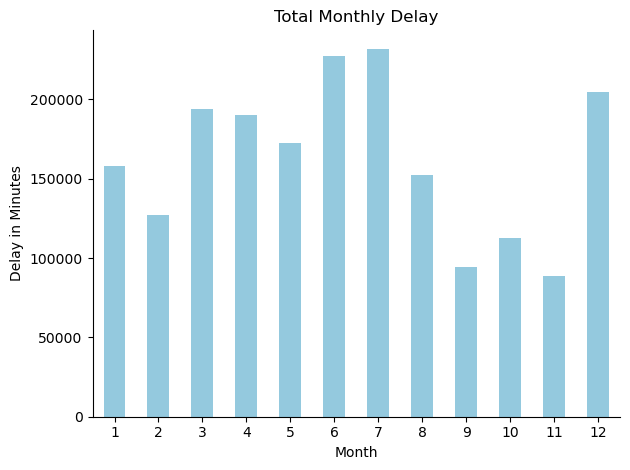

In [15]:
# Here's a solution using Seaborn

# Capture the variables
x = month_delay['month']
y = month_delay['dep_delay']
z = month_delay['cumulative_delay']

fig = plt.figure()
ax = fig.add_subplot(111)

bar_width = 0.5

sns.barplot(x=x,
            y=y,
            ax=ax,
            width=bar_width,
            errwidth=0,
            capsize=7,
            color='skyblue')


ax.set_xlabel('Month')
ax.set_ylabel('Delay in Minutes')
plt.title('Total Monthly Delay')

# Remove the spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.show();

Unfortunately, Seaborn doesn't directly support plotting a bar chart and a line chart on the same axis. Even though there are workarounds, those are not always realiable.

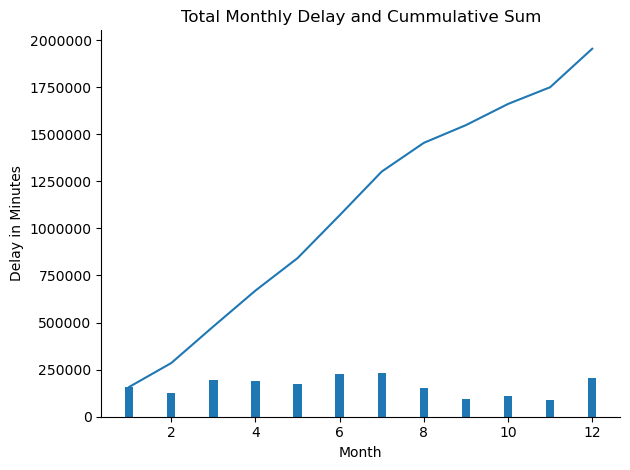

In [16]:
# Here's another solution using matplotlib

# Capture the variables
categories = month_delay['month']
bar_values = month_delay['dep_delay']
line_y = month_delay['cumulative_delay']

# Set the fig and ax
fig = plt.figure()
ax = fig.add_subplot()

bar_width = 0.2
ax.bar(categories, bar_values, width=bar_width, yerr=0)
ax.plot(categories, line_y, linestyle='-')

ax.set_xlabel('Month')
ax.set_ylabel('Delay in Minutes')
ax.set_title('Total Monthly Delay and Cummulative Sum')

# Remove top and bottom spines from bars
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Set y-axis formatter using StrMethodFormatter
formatter = StrMethodFormatter('{x:.0f}')  # Format as standard decimal
ax.yaxis.set_major_formatter(formatter)


plt.tight_layout()
plt.show();